<a href="https://colab.research.google.com/github/DenZhid/DeepLearningLabs/blob/master/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Начальная настройка и входные данные**

**Необходимые импорты**

In [29]:
from numpy import array
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers import LSTM, GRU
from keras.models import Model

import numpy as np

import matplotlib.pyplot as plt

import csv
import os

**Массивы данных**

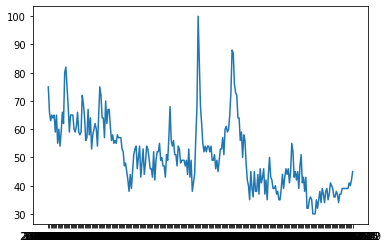

In [50]:
if not os.path.exists('kirkorov_search_trend_2015_2020.csv'):
  !wget https://github.com/DenZhid/DeepLearningLabs/raw/master/lab2/resources/kirkorov_search_trend_2015_2020.csv

if not os.path.exists('neural_networks_trend_2015-2020.csv'):
  !wget https://github.com/DenZhid/DeepLearningLabs/raw/master/lab2/resources/neural_networks_trend_2015-2020.csv

if not os.path.exists('videocards_search_trend_2015-2020.csv'):
  !wget https://github.com/DenZhid/DeepLearningLabs/raw/master/lab2/resources/videocards_search_trend_2015-2020.csv

with open('videocards_search_trend_2015-2020.csv', 'r', newline='') as csvfile:
  spamreader = csv.reader(csvfile, delimiter=',')
  list_of_data = []
  for row in spamreader:
    list_of_data.append(row)
  list_of_data.pop(0)
  list_of_data.pop(0)
  list_of_data.pop(0)
  dates = []
  values = []
  for data in list_of_data:
    dates.append(data[0])
    values.append(int(data[1]))
  plt.plot(dates, values)

# **Имплементация GRU нейронной сети**


**Обучение нейронной сети**

In [24]:
model_GRU = Sequential()
model_GRU.add(GRU(50, activation='relu', input_shape=(3, 1)))
model_GRU.add(Dense(1))
model_GRU.compile(optimizer='adam', loss='mse')

history_GRU = model_GRU.fit(X, Y, epochs=1000, validation_split=0.2, verbose=1)

Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 4035.9231 - val_loss: 15199.9658
Epoch 2/1000
1/1 [==============================] - 0s 37ms/step - loss: 4022.1101 - val_loss: 15154.8682
Epoch 3/1000
1/1 [==============================] - 0s 41ms/step - loss: 4008.1699 - val_loss: 15109.2656
Epoch 4/1000
1/1 [==============================] - 0s 40ms/step - loss: 3994.0886 - val_loss: 15063.0889
Epoch 5/1000
1/1 [==============================] - 0s 44ms/step - loss: 3979.8535 - val_loss: 15016.2627
Epoch 6/1000
1/1 [==============================] - 0s 47ms/step - loss: 3965.4460 - val_loss: 14968.7217
Epoch 7/1000
1/1 [==============================] - 0s 37ms/step - loss: 3950.8474 - val_loss: 14920.3867
Epoch 8/1000
1/1 [==============================] - 0s 44ms/step - loss: 3936.0430 - val_loss: 14871.1768
Epoch 9/1000
1/1 [==============================] - 0s 38ms/step - loss: 3921.0149 - val_loss: 14821.0049
Epoch 10/1000
1/1 [=============================

**Проверка на других данны**

In [28]:
test_input = array([50,51,52])
test_input = test_input.reshape((1, 3, 1))
test_output = model_GRU.predict(test_input, verbose=0)
print(test_output)

[[151.76405]]


# **Имплементация LSTM нейронной сети**

**Обучение нейронной сети**

In [26]:
model_LSTM = Sequential()
model_LSTM.add(LSTM(50, activation='relu', input_shape=(3, 1)))
model_LSTM.add(Dense(1))
model_LSTM.compile(optimizer='adam', loss='mse')

history_LSTM = model_LSTM.fit(X, Y, epochs=1000, validation_split=0.2, verbose=1)

Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 4232.3735 - val_loss: 15876.6611
Epoch 2/1000
1/1 [==============================] - 0s 43ms/step - loss: 4213.0522 - val_loss: 15816.2266
Epoch 3/1000
1/1 [==============================] - 0s 46ms/step - loss: 4194.4595 - val_loss: 15758.3096
Epoch 4/1000
1/1 [==============================] - 0s 41ms/step - loss: 4176.2939 - val_loss: 15701.4502
Epoch 5/1000
1/1 [==============================] - 0s 40ms/step - loss: 4158.8091 - val_loss: 15647.4688
Epoch 6/1000
1/1 [==============================] - 0s 48ms/step - loss: 4142.2036 - val_loss: 15595.5264
Epoch 7/1000
1/1 [==============================] - 0s 46ms/step - loss: 4126.0054 - val_loss: 15546.0205
Epoch 8/1000
1/1 [==============================] - 0s 46ms/step - loss: 4110.2373 - val_loss: 15498.9268
Epoch 9/1000
1/1 [==============================] - 0s 46ms/step - loss: 4094.9290 - val_loss: 15451.0938
Epoch 10/1000
1/1 [=============================

**Проверка на других данны**

In [27]:
test_input = array([50,51,52])
test_input = test_input.reshape((1, 3, 1))
test_output = model_LSTM.predict(test_input, verbose=0)
print(test_output)

[[153.80388]]
